In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet, stopwords
from sklearn.preprocessing import LabelEncoder
from urllib.parse import urlparse

import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [6]:
df_train = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')

In [7]:
df_train

,Unnamed: 0,id,Body,Label
0,4006,83044,"Subject: new jcc stuff vince , i ' m gone thr...",0.0
1,6645,36465,Subject: = ? iso - 8859 - 1 ? q ? automaattine...,1.0
2,13662,30041,Subject: we need your help\n dear southtrust c...,1.0
3,7706,72756,bank accountdoctyp html public wnumbercdtd htm...,1.0
4,10855,54804,Subject: dinner speaker - may 23\n vince :\n m...,0.0
...,...,...,...,...
13148,9225,68399,Subject: re : test dear vince : the email add...,0.0
13149,13123,6407,"Subject: all graphics software available , che...",1.0
13150,9845,56243,Subject: introduction of the european gas advi...,0.0
13151,10799,70202,"Subject: credit business plan hi jeff , my r...",0.0


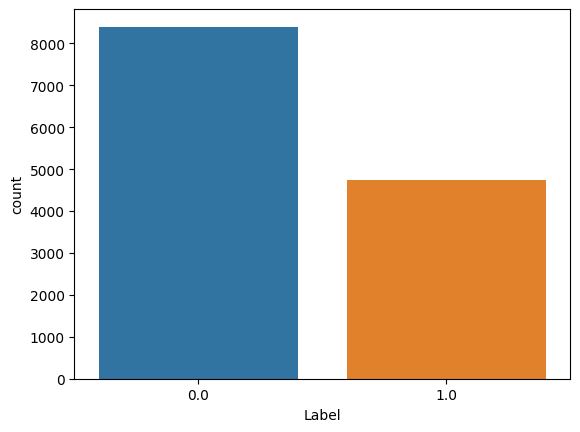

In [8]:
sns.countplot(x=df_train['Label'])
plt.show()

In [9]:
df_train.shape

(13153, 4)

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5638 entries, 0 to 5637
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5638 non-null   int64 
 1   id          5638 non-null   int64 
 2   Body        5638 non-null   object
dtypes: int64(2), object(1)
memory usage: 132.3+ KB


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13153 entries, 0 to 13152
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13153 non-null  int64  
 1   id          13153 non-null  int64  
 2   Body        13153 non-null  object 
 3   Label       13153 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 411.2+ KB


In [12]:
df_train['Label'].value_counts()

Label
0.0    8400
1.0    4753
Name: count, dtype: int64

In [13]:
df_train.drop(['id','Unnamed: 0'], axis=1, inplace=True)
df_test.drop(['Unnamed: 0'], axis=1, inplace=True)

# Punctuation Removal

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
#Function to remove Punctuation
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])# It will discard all punctuations
    return text_nopunct

df_train['clean_body'] = df_train['Body'].apply(lambda x: remove_punct(x))

df_train.head()


,Body,Label,clean_body
0,"Subject: new jcc stuff vince , i ' m gone thr...",0.0,Subject new jcc stuff vince i m gone throug...
1,Subject: = ? iso - 8859 - 1 ? q ? automaattine...,1.0,Subject iso 8859 1 q automaattinen pois...
2,Subject: we need your help\n dear southtrust c...,1.0,Subject we need your help\n dear southtrust cu...
3,bank accountdoctyp html public wnumbercdtd htm...,1.0,bank accountdoctyp html public wnumbercdtd htm...
4,Subject: dinner speaker - may 23\n vince :\n m...,0.0,Subject dinner speaker may 23\n vince \n mich...


In [16]:
df_test['clean_body'] = df_test['Body'].apply(lambda x: remove_punct(x))


# Tokenization


In [17]:
# Function to Tokenize words
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

df_train['body_text_tokenized'] = df_train['clean_body'].apply(lambda x: tokenize(x.lower()))
#We convert to lower as Python is case-sensitive.

df_train.head()

,Body,Label,clean_body,body_text_tokenized
0,"Subject: new jcc stuff vince , i ' m gone thr...",0.0,Subject new jcc stuff vince i m gone throug...,"[subject, new, jcc, stuff, vince, i, m, gone, ..."
1,Subject: = ? iso - 8859 - 1 ? q ? automaattine...,1.0,Subject iso 8859 1 q automaattinen pois...,"[subject, iso, 8859, 1, q, automaattinen, pois..."
2,Subject: we need your help\n dear southtrust c...,1.0,Subject we need your help\n dear southtrust cu...,"[subject, we, need, your, help, dear, southtru..."
3,bank accountdoctyp html public wnumbercdtd htm...,1.0,bank accountdoctyp html public wnumbercdtd htm...,"[bank, accountdoctyp, html, public, wnumbercdt..."
4,Subject: dinner speaker - may 23\n vince :\n m...,0.0,Subject dinner speaker may 23\n vince \n mich...,"[subject, dinner, speaker, may, 23, vince, mic..."


In [18]:
df_test['body_text_tokenized'] = df_test['clean_body'].apply(lambda x: tokenize(x.lower()))
df_test

,id,Body,clean_body,body_text_tokenized
0,22406,Subject: i ' m a changed man\n dear sir / mada...,Subject i m a changed man\n dear sir madam \...,"[subject, i, m, a, changed, man, dear, sir, ma..."
1,19495,Subject: = ? iso - 8859 - 1 ? q ? win _ notice...,Subject iso 8859 1 q win notice \n uk ...,"[subject, iso, 8859, 1, q, win, notice, uk, af..."
2,59875,Subject: ngx - enron - security in place .\n h...,Subject ngx enron security in place \n hi ev...,"[subject, ngx, enron, security, in, place, hi,..."
3,40297,Subject: sitara availability\n as a precaution...,Subject sitara availability\n as a precautiona...,"[subject, sitara, availability, as, a, precaut..."
4,50696,Subject: inception document for gtv ii phase i...,Subject inception document for gtv ii phase ii...,"[subject, inception, document, for, gtv, ii, p..."
...,...,...,...,...
5633,79976,Subject: are you lonely or horney ?\n 100 % fr...,Subject are you lonely or horney \n 100 free ...,"[subject, are, you, lonely, or, horney, 100, f..."
5634,53867,Subject: career opportunity dear mr . kaminsk...,Subject career opportunity dear mr kaminski ...,"[subject, career, opportunity, dear, mr, kamin..."
5635,50221,Subject: abb on eol\n calpine and nrg risk man...,Subject abb on eol\n calpine and nrg risk mana...,"[subject, abb, on, eol, calpine, and, nrg, ris..."
5636,64131,bad focusclick behaviourtoni nugent sender dat...,bad focusclick behaviourtoni nugent sender dat...,"[bad, focusclick, behaviourtoni, nugent, sende..."


# Stop Word Removal

Stopwords are the commonly used words and are removed from the text as they do not add any value to the analysis. These words carry less or no meaning.

In [19]:
stopword = nltk.corpus.stopwords.words('english')# All English Stopwords

In [20]:
# Function to remove Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]# To remove all stopwords
    return text

df_test['body_text_nostopwords'] = df_test['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

df_test.head()

,id,Body,clean_body,body_text_tokenized,body_text_nostopwords
0,22406,Subject: i ' m a changed man\n dear sir / mada...,Subject i m a changed man\n dear sir madam \...,"[subject, i, m, a, changed, man, dear, sir, ma...","[subject, changed, man, dear, sir, madam, p, p..."
1,19495,Subject: = ? iso - 8859 - 1 ? q ? win _ notice...,Subject iso 8859 1 q win notice \n uk ...,"[subject, iso, 8859, 1, q, win, notice, uk, af...","[subject, iso, 8859, 1, q, win, notice, uk, af..."
2,59875,Subject: ngx - enron - security in place .\n h...,Subject ngx enron security in place \n hi ev...,"[subject, ngx, enron, security, in, place, hi,...","[subject, ngx, enron, security, place, hi, eve..."
3,40297,Subject: sitara availability\n as a precaution...,Subject sitara availability\n as a precautiona...,"[subject, sitara, availability, as, a, precaut...","[subject, sitara, availability, precautionary,..."
4,50696,Subject: inception document for gtv ii phase i...,Subject inception document for gtv ii phase ii...,"[subject, inception, document, for, gtv, ii, p...","[subject, inception, document, gtv, ii, phase,..."


In [21]:
df_train['body_text_nostopwords'] = df_train['body_text_tokenized'].apply(lambda x: remove_stopwords(x))


In [22]:
df_train

,Body,Label,clean_body,body_text_tokenized,body_text_nostopwords
0,"Subject: new jcc stuff vince , i ' m gone thr...",0.0,Subject new jcc stuff vince i m gone throug...,"[subject, new, jcc, stuff, vince, i, m, gone, ...","[subject, new, jcc, stuff, vince, gone, wednes..."
1,Subject: = ? iso - 8859 - 1 ? q ? automaattine...,1.0,Subject iso 8859 1 q automaattinen pois...,"[subject, iso, 8859, 1, q, automaattinen, pois...","[subject, iso, 8859, 1, q, automaattinen, pois..."
2,Subject: we need your help\n dear southtrust c...,1.0,Subject we need your help\n dear southtrust cu...,"[subject, we, need, your, help, dear, southtru...","[subject, need, help, dear, southtrust, custom..."
3,bank accountdoctyp html public wnumbercdtd htm...,1.0,bank accountdoctyp html public wnumbercdtd htm...,"[bank, accountdoctyp, html, public, wnumbercdt...","[bank, accountdoctyp, html, public, wnumbercdt..."
4,Subject: dinner speaker - may 23\n vince :\n m...,0.0,Subject dinner speaker may 23\n vince \n mich...,"[subject, dinner, speaker, may, 23, vince, mic...","[subject, dinner, speaker, may, 23, vince, mic..."
...,...,...,...,...,...
13148,Subject: re : test dear vince : the email add...,0.0,Subject re test dear vince the email addres...,"[subject, re, test, dear, vince, the, email, a...","[subject, test, dear, vince, email, address, c..."
13149,"Subject: all graphics software available , che...",1.0,Subject all graphics software available cheap...,"[subject, all, graphics, software, available, ...","[subject, graphics, software, available, cheap..."
13150,Subject: introduction of the european gas advi...,0.0,Subject introduction of the european gas advis...,"[subject, introduction, of, the, european, gas...","[subject, introduction, european, gas, advisor..."
13151,"Subject: credit business plan hi jeff , my r...",0.0,Subject credit business plan hi jeff my res...,"[subject, credit, business, plan, hi, jeff, my...","[subject, credit, business, plan, hi, jeff, re..."


# Stemming

In [ ]:
""""#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
df_train['msg_stemmed']=df_train['no_stopwords'].apply(lambda x: stemming(x))
df_train"""""

In [ ]:
"""#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
df_test['msg_stemmed']=df_test['no_stopwords'].apply(lambda x: stemming(x))
df_test""""

# Lemmatization

In [23]:
from nltk import WordNetLemmatizer

wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df_train['body_text_lemmatized'] = df_train['body_text_nostopwords'].apply(lambda x: lemmatizing(x))

df_train.head(5)

,Body,Label,clean_body,body_text_tokenized,body_text_nostopwords,body_text_lemmatized
0,"Subject: new jcc stuff vince , i ' m gone thr...",0.0,Subject new jcc stuff vince i m gone throug...,"[subject, new, jcc, stuff, vince, i, m, gone, ...","[subject, new, jcc, stuff, vince, gone, wednes...","[subject, new, jcc, stuff, vince, gone, wednes..."
1,Subject: = ? iso - 8859 - 1 ? q ? automaattine...,1.0,Subject iso 8859 1 q automaattinen pois...,"[subject, iso, 8859, 1, q, automaattinen, pois...","[subject, iso, 8859, 1, q, automaattinen, pois...","[subject, iso, 8859, 1, q, automaattinen, pois..."
2,Subject: we need your help\n dear southtrust c...,1.0,Subject we need your help\n dear southtrust cu...,"[subject, we, need, your, help, dear, southtru...","[subject, need, help, dear, southtrust, custom...","[subject, need, help, dear, southtrust, custom..."
3,bank accountdoctyp html public wnumbercdtd htm...,1.0,bank accountdoctyp html public wnumbercdtd htm...,"[bank, accountdoctyp, html, public, wnumbercdt...","[bank, accountdoctyp, html, public, wnumbercdt...","[bank, accountdoctyp, html, public, wnumbercdt..."
4,Subject: dinner speaker - may 23\n vince :\n m...,0.0,Subject dinner speaker may 23\n vince \n mich...,"[subject, dinner, speaker, may, 23, vince, mic...","[subject, dinner, speaker, may, 23, vince, mic...","[subject, dinner, speaker, may, 23, vince, mic..."


In [24]:
df_test['body_text_lemmatized'] = df_test['body_text_nostopwords'].apply(lambda x: lemmatizing(x))
df_test

,id,Body,clean_body,body_text_tokenized,body_text_nostopwords,body_text_lemmatized
0,22406,Subject: i ' m a changed man\n dear sir / mada...,Subject i m a changed man\n dear sir madam \...,"[subject, i, m, a, changed, man, dear, sir, ma...","[subject, changed, man, dear, sir, madam, p, p...","[subject, changed, man, dear, sir, madam, p, p..."
1,19495,Subject: = ? iso - 8859 - 1 ? q ? win _ notice...,Subject iso 8859 1 q win notice \n uk ...,"[subject, iso, 8859, 1, q, win, notice, uk, af...","[subject, iso, 8859, 1, q, win, notice, uk, af...","[subject, iso, 8859, 1, q, win, notice, uk, af..."
2,59875,Subject: ngx - enron - security in place .\n h...,Subject ngx enron security in place \n hi ev...,"[subject, ngx, enron, security, in, place, hi,...","[subject, ngx, enron, security, place, hi, eve...","[subject, ngx, enron, security, place, hi, eve..."
3,40297,Subject: sitara availability\n as a precaution...,Subject sitara availability\n as a precautiona...,"[subject, sitara, availability, as, a, precaut...","[subject, sitara, availability, precautionary,...","[subject, sitara, availability, precautionary,..."
4,50696,Subject: inception document for gtv ii phase i...,Subject inception document for gtv ii phase ii...,"[subject, inception, document, for, gtv, ii, p...","[subject, inception, document, gtv, ii, phase,...","[subject, inception, document, gtv, ii, phase,..."
...,...,...,...,...,...,...
5633,79976,Subject: are you lonely or horney ?\n 100 % fr...,Subject are you lonely or horney \n 100 free ...,"[subject, are, you, lonely, or, horney, 100, f...","[subject, lonely, horney, 100, free, adult, pe...","[subject, lonely, horney, 100, free, adult, pe..."
5634,53867,Subject: career opportunity dear mr . kaminsk...,Subject career opportunity dear mr kaminski ...,"[subject, career, opportunity, dear, mr, kamin...","[subject, career, opportunity, dear, mr, kamin...","[subject, career, opportunity, dear, mr, kamin..."
5635,50221,Subject: abb on eol\n calpine and nrg risk man...,Subject abb on eol\n calpine and nrg risk mana...,"[subject, abb, on, eol, calpine, and, nrg, ris...","[subject, abb, eol, calpine, nrg, risk, manage...","[subject, abb, eol, calpine, nrg, risk, manage..."
5636,64131,bad focusclick behaviourtoni nugent sender dat...,bad focusclick behaviourtoni nugent sender dat...,"[bad, focusclick, behaviourtoni, nugent, sende...","[bad, focusclick, behaviourtoni, nugent, sende...","[bad, focusclick, behaviourtoni, nugent, sende..."


# Word2vector

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE


X_train = df_train['body_text_lemmatized'].tolist()
X_test = df_test['body_text_lemmatized'].tolist()  # Use df_test for test data

# Define your desired parameters for Word2Vec
vector_size = 100
window = 5
min_count = 5
alpha = 0.025
negative = 5
epochs = 20

# Create and train the Word2Vec model
model = Word2Vec(sentences=X_train,
                 vector_size=vector_size,
                 window=window,
                 min_count=min_count,
                 alpha=alpha,
                 negative=negative,
                 epochs=epochs)

# Save the trained model for future use
model.save("word2vec_modelnew.bin")




In [28]:
# Convert text data to word vectors using the trained Word2Vec model for both train and test
def convert_to_word_vectors(data, model, vector_size):
    data_word_vectors = []
    for sentence in data:
        sentence_vectors = [model.wv[word] for word in sentence if word in model.wv]
        if sentence_vectors:
            sentence_vector = np.mean(sentence_vectors, axis=0)
            data_word_vectors.append(sentence_vector)
        else:
            data_word_vectors.append(np.zeros(vector_size))
    return data_word_vectors

X_train_word_vectors = convert_to_word_vectors(X_train, model, vector_size)
X_test_word_vectors = convert_to_word_vectors(X_test, model, vector_size)

# Experiment with different hyperparameters for K-Means
num_clusters_list = [2, 3, 4, 5]
init_methods = ['k-means++', 'random']
max_iterations = [100, 300]
tolerance = [1e-4, 1e-5]

best_silhouette_score = float('-inf')
best_params = {}

for num_clusters in num_clusters_list:
    for init in init_methods:
        for max_iter in max_iterations:
            for tol in tolerance:
                kmeans = KMeans(n_clusters=num_clusters, init=init, max_iter=max_iter, tol=tol, random_state=42)
                cluster_labels = kmeans.fit_predict(X_train_word_vectors)
                
                # Calculate silhouette score for each clustering solution
                silhouette_avg = silhouette_score(X_train_word_vectors, cluster_labels)
                
                if silhouette_avg > best_silhouette_score:
                    best_silhouette_score = silhouette_avg
                    best_params = {
                        'num_clusters': num_clusters,
                        'init': init,
                        'max_iter': max_iter,
                        'tol': tol
                    }

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_silhouette_score)



Best Parameters: {'num_clusters': 2, 'init': 'k-means++', 'max_iter': 100, 'tol': 1e-05}
Best Silhouette Score: 0.18049634689608118


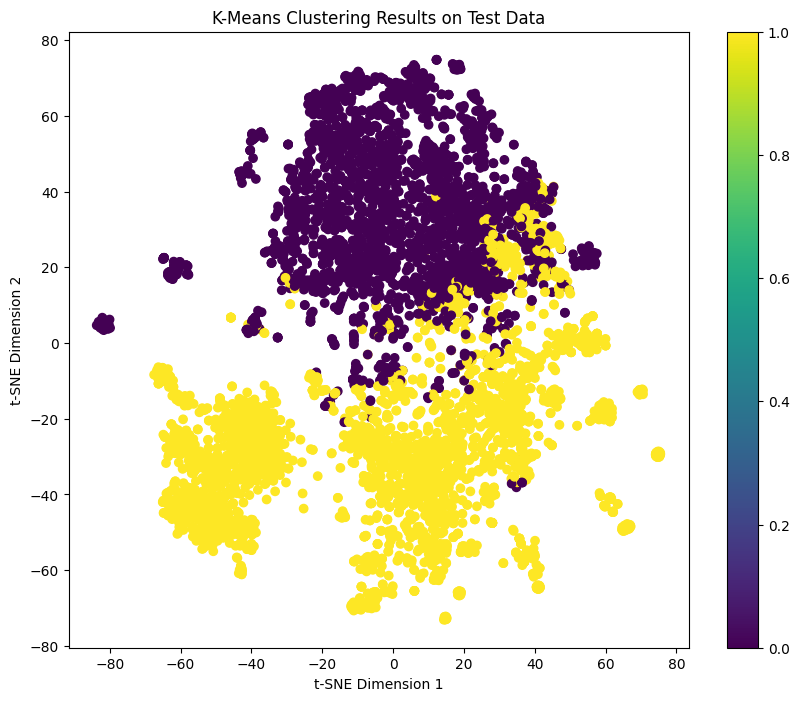

In [29]:
# Apply K-Means clustering on training data with the best parameters
kmeans = KMeans(n_clusters=best_params['num_clusters'],
                init=best_params['init'],
                max_iter=best_params['max_iter'],
                tol=best_params['tol'],
                random_state=42)
train_cluster_labels = kmeans.fit_predict(X_train_word_vectors)

# Predict clusters on test data using the trained K-Means model
test_cluster_labels = kmeans.predict(X_test_word_vectors)

# Perform dimensionality reduction for visualization on test data
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_word_vectors)

# Plot the clusters on test data
plt.figure(figsize=(10, 8))
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_cluster_labels, cmap='viridis')
plt.title('K-Means Clustering Results on Test Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()

Accuracy: 0.7809625180567171


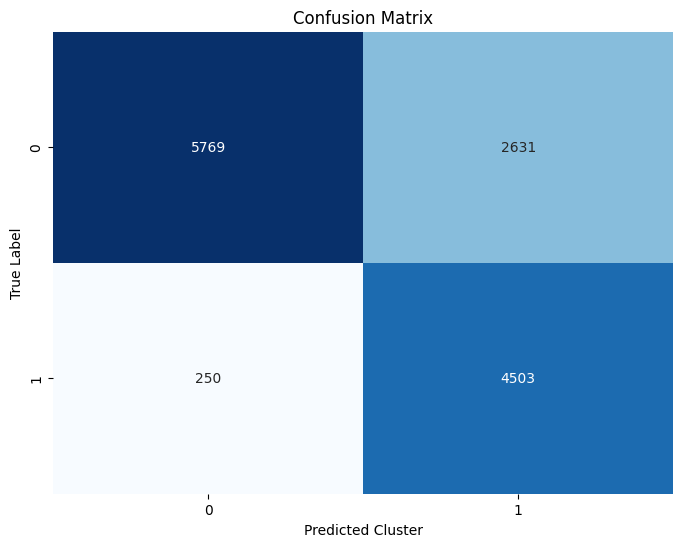

In [30]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your code for Word2Vec and clustering)

# Assuming you have a target column named 'target' in your train DataFrame
ground_truth_labels = df_train['Label'].values

# Apply K-Means clustering on training data with the best parameters
kmeans = KMeans(n_clusters=best_params['num_clusters'],
                init=best_params['init'],
                max_iter=best_params['max_iter'],
                tol=best_params['tol'],
                random_state=42)
train_cluster_labels = kmeans.fit_predict(X_train_word_vectors)

# Calculate accuracy
accuracy = accuracy_score(ground_truth_labels, train_cluster_labels)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(ground_truth_labels, train_cluster_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Cluster')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [31]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, accuracy_score
from scipy.stats import mode

# ... (Your code for Word2Vec and clustering)

# Assuming you have a target column named 'target' in your train DataFrame
ground_truth_labels = df_train['Label'].values

# Apply K-Means clustering on training data with the best parameters
kmeans = KMeans(n_clusters=best_params['num_clusters'],
                init=best_params['init'],
                max_iter=best_params['max_iter'],
                tol=best_params['tol'],
                random_state=42)
train_cluster_labels = kmeans.fit_predict(X_train_word_vectors)

# Calculate the majority class within each cluster
cluster_majority_classes = []
for cluster in range(best_params['num_clusters']):
    cluster_indices = np.where(train_cluster_labels == cluster)[0]
    cluster_labels = ground_truth_labels[cluster_indices]
    majority_class = mode(cluster_labels)[0][0]
    cluster_majority_classes.append(majority_class)

# Assign majority class labels to the cluster labels
assigned_labels = np.array([cluster_majority_classes[label] for label in train_cluster_labels])

# Calculate precision for each class
precision_class_0 = precision_score(ground_truth_labels, assigned_labels, pos_label=0)
precision_class_1 = precision_score(ground_truth_labels, assigned_labels, pos_label=1)

# Calculate accuracy
accuracy = accuracy_score(ground_truth_labels, assigned_labels)

print("Precision (Class 0):", precision_class_0)
print("Precision (Class 1):", precision_class_1)
print("Accuracy:", accuracy)


Precision (Class 0): 0.9584648612726366
Precision (Class 1): 0.6312026913372581
Accuracy: 0.7809625180567171


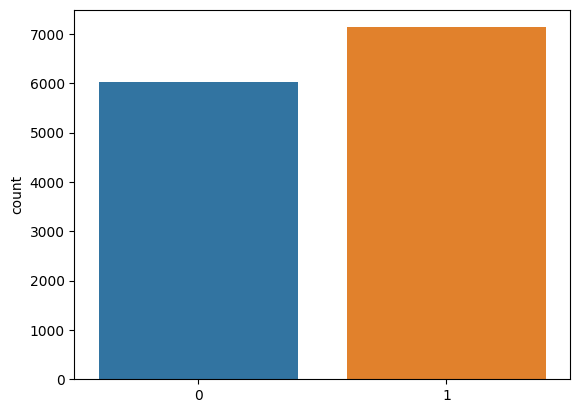

In [32]:
sns.countplot(x=train_cluster_labels)
plt.show()

In [35]:
import pandas as pd

# Predict clusters on test data using the trained K-Means model
test_cluster_labels = kmeans.predict(X_test_word_vectors)

# Create a submission DataFrame with text data and predicted cluster labels
submission_df = pd.DataFrame({'id': df_test['id'], 'Label': test_cluster_labels})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('testt - final2.csv', index=False)



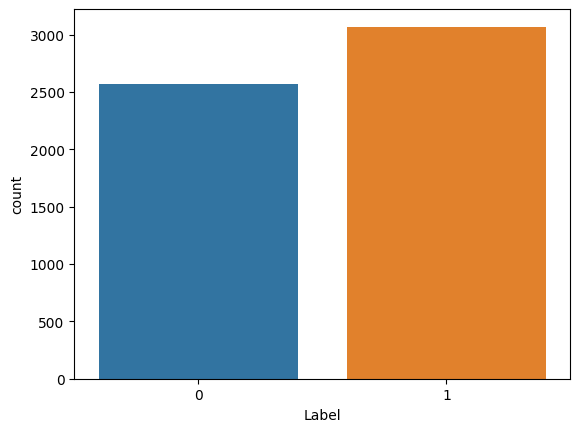

In [34]:
sns.countplot(x=submission_df['Label'])
plt.show()